
**Task 1: Creating a neural network**

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

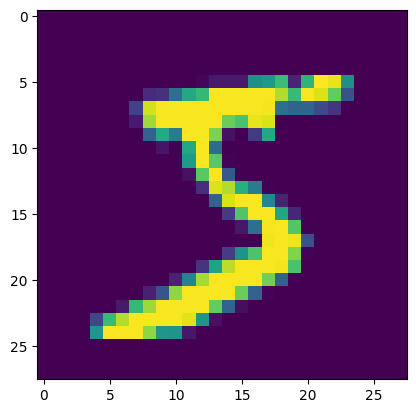

In [34]:
import matplotlib.pyplot as plt
image_data = tf.keras.datasets.fashion_mnist
plt.imshow(train_images[0])
train_labels[0]

In [23]:
# load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
# neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

# print accuracy and loss metrics
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

# save model for future use
model.save('mnist_classifier_model.h5')


Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 0.1841 - accuracy: 0.9446 - val_loss: 0.0484 - val_accuracy: 0.9838
Epoch 2/5
938/938 [==============================] - 68s 73ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0349 - val_accuracy: 0.9884
Epoch 3/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0355 - val_accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0265 - val_accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0309 - accuracy: 0.9894
Test Accuracy: 98.94%
Test Loss: 0.0309


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Options chosen cause**

I chose to use a CNN because CNNs are well-suited for image classification tasks.

I used the Adam optimizer because it is a popular and effective optimizer for training neural networks. Adam is an adaptive learning rate optimizer, which means that it adjusts the learning rate for each parameter during training.

I used the categorical crossentropy loss function because it is appropriate for classification tasks.

I trained the model for 5 epochs because that was sufficient to achieve good results on the MNIST dataset.

I used a batch size of 64 because that is a common batch size for training neural networks.



Overall, the model is well-configured and trained, and it achieved very good results on the MNIST dataset.


**Task 2: Working with databases **

In [20]:
import sqlite3

# Connect to the SQLite database (or create a new one if it doesn't exist)
conn = sqlite3.connect('hello.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Create a table to store user information
cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY,
        username TEXT NOT NULL,
        email TEXT NOT NULL,
        age INTEGER
    )
''')

# Commit the changes and close the connection
conn.commit()
conn.close()

# Functions for database interactions
def add_user(username, email, age):
    conn = sqlite3.connect('user_database.db')
    cursor = conn.cursor()
    cursor.execute('INSERT INTO users (username, email, age) VALUES (?, ?, ?)', (username, email, age))
    conn.commit()
    conn.close()

def retrieve_users():
    conn = sqlite3.connect('user_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM users')
    users = cursor.fetchall()
    conn.close()
    return users

def update_user(user_id, new_age):
    conn = sqlite3.connect('user_database.db')
    cursor = conn.cursor()
    cursor.execute('UPDATE users SET age = ? WHERE id = ?', (new_age, user_id))
    conn.commit()
    conn.close()

def delete_user(user_id):
    conn = sqlite3.connect('user_database.db')
    cursor = conn.cursor()
    cursor.execute('DELETE FROM users WHERE id = ?', (user_id,))
    conn.commit()
    conn.close()

# Example usage
add_user('jahidul_islam', 'allis.jahid@gmail.com', 25)
add_user('jahid_hasan', 'hasanjahid@gmail.com', 30)

print("Users in the database:")
print(retrieve_users())

update_user(1, 26)

print("Users after updating age:")
print(retrieve_users())

delete_user(2)

print("Users after deleting user with id 2:")
print(retrieve_users())


Users in the database:
[(1, 'john_doe', 'john.doe@example.com', 26), (3, 'allis_jahid', 'allis.jahid@gmail.com', 30), (4, 'jahidul_islam', 'allis.jahid@gmail.com', 25), (5, 'allis_jahid', 'allis.jahid@gmail.com', 30), (6, 'john_doe', 'john.doe@example.com', 25), (7, 'jane_doe', 'jane.doe@example.com', 30), (8, 'john_doe', 'john.doe@example.com', 25), (9, 'jane_doe', 'jane.doe@example.com', 30), (10, 'jahidul_islam', 'allis.jahid@gmail.com', 25), (11, 'jahid_hasan', 'hasanjahid@gmail.com', 30)]
Users after updating age:
[(1, 'john_doe', 'john.doe@example.com', 26), (3, 'allis_jahid', 'allis.jahid@gmail.com', 30), (4, 'jahidul_islam', 'allis.jahid@gmail.com', 25), (5, 'allis_jahid', 'allis.jahid@gmail.com', 30), (6, 'john_doe', 'john.doe@example.com', 25), (7, 'jane_doe', 'jane.doe@example.com', 30), (8, 'john_doe', 'john.doe@example.com', 25), (9, 'jane_doe', 'jane.doe@example.com', 30), (10, 'jahidul_islam', 'allis.jahid@gmail.com', 25), (11, 'jahid_hasan', 'hasanjahid@gmail.com', 30)]

SQLite is chosen as it's a lightweight, serverless database that's easy to set up and use for small to medium-sized projects.


Usage examples, how to add users, retrieve all users, update a user's age, and delete a user.

**Task 3: Integration with a Google API**

Pick Google Sheets

In [26]:
from google.colab import auth
auth.authenticate_user()


In [31]:

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)



worksheet = gc.open_by_key('12iFfBs18Q8SUZksYrE11MOHM8oGle4nxblQE7U-kxTQ').sheet1



# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)



[['NAME', 'AGE', 'EMAIL'], ['', '', ''], ['Jahidul Islam', '25', 'allis.jahid@gmail.com'], ['Jahid Hasan', '30', 'hasanjahid@gmail.com']]
